<a href="https://colab.research.google.com/github/VinayakaGandadi/Bangalore_housing_price_prediction/blob/developement/Linear_Regression_all_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(array([1., 1., 1., 1., 1., 3., 1., 5., 2., 2., 1., 5., 0., 3., 5., 2., 2.,
        1., 1., 2., 2., 3., 2., 4., 1., 5., 1., 1., 6., 4., 2., 2., 2., 3.,
        8., 1., 2., 5., 1., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 2.92821863,  3.10106975,  3.27392088,  3.446772  ,  3.61962312,
         3.79247425,  3.96532537,  4.1381765 ,  4.31102762,  4.48387874,
         4.65672987,  4.82958099,  5.00243212,  5.17528324,  5.34813437,
         5.52098549,  5.69383661,  5.86668774,  6.03953886,  6.21238999,
         6.38524111,  6.55809223,  6.73094336,  6.90379448,  7.07664561,
         7.24949673,  7.42234785,  7.59519898,  7.7680501 ,  7.94090123,
         8.11375235,  8.28660348,  8.4594546 ,  8.63230572,  8.80515685,
         8.97800797,  9.1508591 ,  9.32371022,  9.49656134,  9.66941247,
         9.84226359, 10.01511472, 10.18796584, 10.36081696, 10.53366809,
        10.70651921, 10.87937034, 11.05222146, 11.22507259, 11.39792371,
        11.57077483]),
 <a list of 50 Patch 

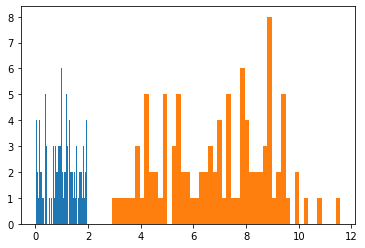

In [ ]:
plt.hist(X,bins=50)
plt.hist(y,bins=50)

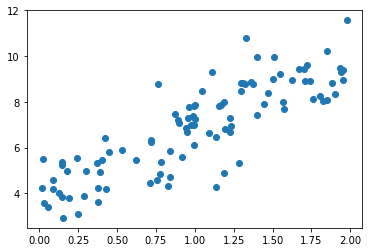

In [ ]:
plt.scatter(X,y)

# Using normal Method

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.87101054],
       [2.98552352]])

In [ ]:
X_new = np.array([[1], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance >>> 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[6.85653406],
       [9.84205758]])

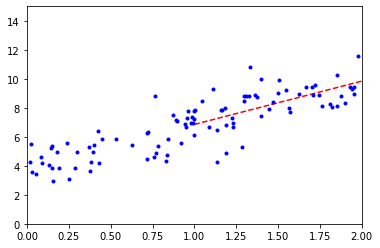

In [ ]:
plt.plot(X_new, y_predict, "r--") 
plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15]) 
plt.show()

# Using Sklearn or SVD

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ 
lin_reg.predict(X_new)

array([[6.85653406],
       [9.84205758]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[3.87101054],
        [2.98552352]]),
 array([113.14843709]),
 2,
 array([14.80130964,  3.82742561]))

# Using Batch Gradient Decent(Gradient Decent)

In [ ]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
   gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
   theta= theta- eta * gradients
theta 

array([[3.87101054],
       [2.98552352]])

# Using Stochastic Gradient Decent

In [ ]:
n_epochs = 50 
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t): return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs): #number of iterations
  for i in range(m): 
    random_index = np.random.randint(m) 
    xi = X_b[random_index:random_index+1] 
    yi = y[random_index:random_index+1] 
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
    eta = learning_schedule(epoch * m + i) 
    theta = theta - eta * gradients
theta

array([[3.87104569],
       [3.02374265]])

SGD Using sklearn 

In [ ]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88957753]), array([3.07603613]))

# Mini batch Gradient Decent

In [ ]:
#at each step, instead of computing the gradients based on the full training set (as in Batch GD) or 
#based on just one instance (as in Stochastic GD), Mini-batch GD computes
# the gradients on small random sets of instances called mini-batches

# Polynomial Regression

In [ ]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


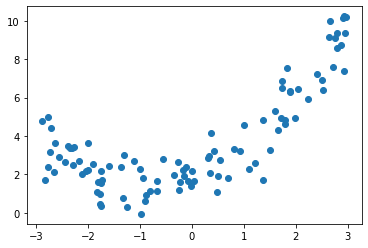

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]


array([-2.43334262,  5.9211563 ])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8818709]), array([[0.94234687, 0.55190326]]))

# Cross validation

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y): 
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
  train_errors, val_errors = [], [] 
  for m in range(1, len(X_train)): 
    model.fit(X_train[:m], y_train[:m]) 
    y_train_predict = model.predict(X_train[:m]) 
    y_val_predict = model.predict(X_val) 
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

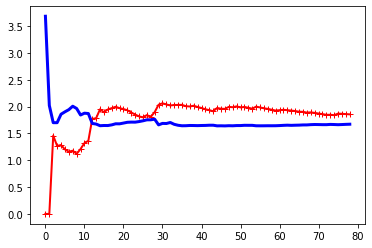

In [ ]:
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

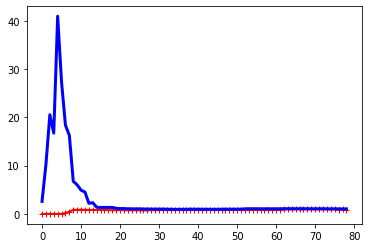

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([ ("poly_features", PolynomialFeatures(degree=5, include_bias=False)), ("lin_reg", LinearRegression()),
]) 
plot_learning_curves(polynomial_regression, X, y)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[5.29475412]])

In [ ]:
#ridge regression using sgd here penalty=l2 implies it is l2 norm regularized term
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.27179207])

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.25423662])

# ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.25426473])

# Early stopping

In [ ]:
'''from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# prepare the data 
poly_scaler = Pipeline([ ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train) 
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf") 
best_epoch = None 
best_model = None 
for epoch in range(1000): 
  sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off 
  y_val_predict = sgd_reg.predict(X_val_poly_scaled) 
  val_error = mean_squared_error(y_val, y_val_predict) 
  if val_error < minimum_val_error: 
    minimum_val_error = val_error 
    best_epoch = epoch 
    best_model = clone(sgd_reg)'''

'from sklearn.base import clone\nfrom sklearn.preprocessing import StandardScaler\n# prepare the data \npoly_scaler = Pipeline([ ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ("std_scaler", StandardScaler())])\nX_train_poly_scaled = poly_scaler.fit_transform(X_train) \nX_val_poly_scaled = poly_scaler.transform(X_val)\nsgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)\nminimum_val_error = float("inf") \nbest_epoch = None \nbest_model = None \nfor epoch in range(1000): \n  sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off \n  y_val_predict = sgd_reg.predict(X_val_poly_scaled) \n  val_error = mean_squared_error(y_val, y_val_predict) \n  if val_error < minimum_val_error: \n    minimum_val_error = val_error \n    best_epoch = epoch \n    best_model = clone(sgd_reg)'